In [2]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# apitoken = '0ac08bc0e23b22dcff4888822d56241be15b0a64e77e94c42639a524404aafbc7df008ab6043e4706b3b82aa42f03c06464b3c253b92ddf1337e80048cf53be0'
# IBMQ.save_account(apitoken, overwrite = True)

In [3]:
def circuit_p3(case, n):
    qc = QuantumCircuit(n)
    
    for qubit in range(n):
        qc.h(qubit)
    
    if case == 1:
        qc.rz(np.pi, 0)
    
    elif case == 2:
        qc.rz(np.pi/2, 0)
        qc.ry(np.pi, 1)
    
    elif case == 3:
        qc.rz(np.pi/4, 0)
        qc.rz(np.pi/2, 1)
        qc.ry(np.pi, 2)
    
    return qc
    
def qft(qc, n):
    # qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(np.pi/float(2**(j-m)), m, j)
        qc.h(j)
        
    qc.name = "QFT"
    return qc

def qft_dagger(qc, n):
    # qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
        
    qc.name = "QFT"
    return qc


In [8]:
circuit = circuit_p3(3, 4)
circuit = qft_dagger(circuit, 4)
circuit.measure_all()
circuit.draw()


┌───┐┌─────────┐   ┌───┐                                      »
   q_0: ┤ H ├┤ Rz(π/4) ├─X─┤ H ├─■───────────────■────────────────────»
        ├───┤├─────────┤ │ └───┘ │U1(-π/2) ┌───┐ │                    »
   q_1: ┤ H ├┤ Rz(π/2) ├─┼───X───■─────────┤ H ├─┼──────────■─────────»
        ├───┤└┬───────┬┘ │   │             └───┘ │U1(-π/4)  │U1(-π/2) »
   q_2: ┤ H ├─┤ Ry(π) ├──┼───X───────────────────■──────────■─────────»
        ├───┤ └───────┘  │                                            »
   q_3: ┤ H ├────────────X────────────────────────────────────────────»
        └───┘                                                         »
meas: 4/══════════════════════════════════════════════════════════════»
                                                                      »
«                                                    ░ ┌─┐         
«   q_0: ─■──────────────────────────────────────────░─┤M├─────────
«         │                                          ░ └╥┘┌─┐      
«   q_1: ─┼───────────────■──────────────────────────░──╫─┤M├──────
«         │         ┌───┐ │                          ░  ║ └╥┘┌─┐   
«   q_2: ─┼─────────┤ H ├─┼──────────■───────────────░──╫──╫─┤M├───
«         │U1(-π/8) └───┘ │U1(-π/4)  │U1(-π/2) ┌───┐ ░  ║  ║ └╥┘┌─┐
«   q_3: ─■───────────────■──────────■─────────┤ H ├─░──╫──╫──╫─┤M├
«                                              └───┘ ░  ║  ║  ║ └╥┘
«meas: 4/═══════════════════════════════════════════════╩══╩══╩══╩═
«                                                       0  1  2  3

{'0010': 2048}


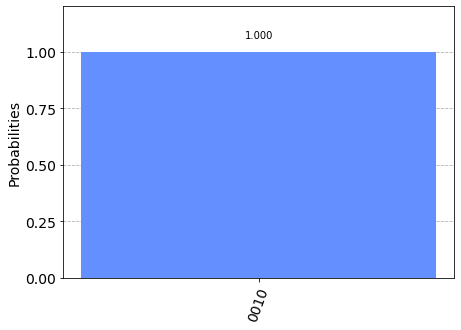

In [9]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 2048)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# simulator = Aer.get_backend('statevector_simulator')
# job = execute(circuit, simulator)
# result = job.result()
# statevector = result.get_statevector()
# print(statevector)
# plot_bloch_multivector(statevector)